In [1]:
plt.figure(figsize=(20,20))
df.groupby(['City'])['ZIP Code'].count().sort_values(ascending=False).plot.bar()

NameError: name 'plt' is not defined

# Data Cleaning Methodology

## Census API Data Pull

In [1]:
!pip install pandas-profiling


    100% |████████████████████████████████| 245kB 7.9MB/s ta 0:00:011
    100% |████████████████████████████████| 307kB 2.6MB/s ta 0:00:011
    100% |████████████████████████████████| 9.5MB 1.7MB/s eta 0:00:01
    100% |████████████████████████████████| 3.1MB 5.4MB/s eta 0:00:01
    100% |████████████████████████████████| 81kB 14.9MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 11.8MB/s ta 0:00:01
    100% |████████████████████████████████| 604kB 18.2MB/s ta 0:00:01
    100% |████████████████████████████████| 286kB 21.0MB/s ta 0:00:01
    100% |████████████████████████████████| 11.6MB 892kB/s eta 0:00:01
    100% |████████████████████████████████| 25.9MB 860kB/s eta 0:00:01   34% |███████████                     | 9.0MB 18.1MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 12.5MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 11.1MB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 6.2MB/s ta 0:00:01
    100% |███████████████

    100% |████████████████████████████████| 2.2MB 14.9MB/s 


    100% |████████████████████████████████| 245kB 22.7MB/s ta 0:00:01
  Running setup.py bdist_wheel for phik ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/af/54/11/aba77f21075918de02f7964eabfe8c10d5542df9e6ad10b225
  Running setup.py bdist_wheel for htmlmin ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
matplotlib 3.3.3 has requirement pillow>=6.2.0, but you'll have pillow 5.3.0 which is incompatible.
  Found existing installation: numpy 1.13.3
    Uninstalling numpy-1.13.3:
      Successfully uninstalled numpy-1.13.3
  Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4
  Found existing installation: networkx 2.2
    Uninstalling networkx-2.2:
      Successfully uninstalled networkx-2.2
  Found existing installation: attrs 18.2.0
    Uninstalling attrs-18.2.0:
      Successfully uninstalled att

  Found existing installation: requests 2.21.0
    Uninstalling requests-2.21.0:
      Successfully uninstalled requests-2.21.0
  Found existing installation: Jinja2 2.10
    Uninstalling Jinja2-2.10:
      Successfully uninstalled Jinja2-2.10
  Found existing installation: widgetsnbextension 3.2.1
    Uninstalling widgetsnbextension-3.2.1:
      Successfully uninstalled widgetsnbextension-3.2.1
  Found existing installation: ipywidgets 7.2.1
    Uninstalling ipywidgets-7.2.1:
      Successfully uninstalled ipywidgets-7.2.1


In [2]:
# !pip install matplotlib

In [3]:
!pip install census

In [4]:
!pip install us

    100% |████████████████████████████████| 133kB 3.5MB/s ta 0:00:01
  Running setup.py bdist_wheel for us ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/e2/16/45/6453383ffa495670f0f6b80a3e697a9771d98cfbaf8b451e73
  Running setup.py bdist_wheel for jellyfish ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/9c/6f/33/92bb9a4b4562a60ba6a80cedbab8907e48bc7a8b1f369ea0ae
Successfully built us jellyfish


In [5]:
# Import Libraries for API Key
from census import Census
from us import states
import csv
import time
import pdb
import pandas as pd
import os
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np

# Initialize Census object with API key to utilize census python wrapper to pull data
c = Census("a843158c55ae161d6ec8bfe7530da4c8e5acebbc")

The below is an example of a dictionary we will build out that will contain all of the tables
we intend to make request to in the census api. We will leverage the **sub-group** as the key (i.e. B17015_038E) and **description** as the value. Overall, we intend to make request for each of these categories and likely more as the project develops:
- unemployment rate
- Poverty Rate
- Median Household Income rate
- Educational Attainment
- Race/demographics
- Geo-location
- AT HOME FOR THE POPULATION 25 YEARS AND OVER
- Per capita income

In [6]:
# Key is an example of the name that needs to be passed in to get data
tables_dict = {
    'B17015_038E': "POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY FAMILY TYPE BY SOCIAL SECURITY INCOME BY SUPPLEMENTAL SECURITY INCOME (SSI) AND CASH PUBLIC ASSISTANCE INCOME",
    'B23025_004E': "Estimate!!Total!!In labor force!!Civilian labor force!!Employed",
    'B23025_005E': "Estimate!!Total!!In labor force!!Civilian labor force!!Unemployed",
    'B23025_003E': "Estimate!!Total!!In labor force!!Civilian labor force",
    "B23025_002E": "Estimate!!Total!!In labor force",
    "B23025_007E": "Estimate!!Total!!Not in labor force",
    "B19301E_001E": "Estimate!!Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19301A_001E": "Estimate!!Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19301D_001E": "Estimate!!Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19301C_001E": "Estimate!!Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19301B_001E": "Estimate!!Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19301H_001E": "Estimate!!Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19301I_001E": "Estimate!!Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19301G_001E": "Estimate!!Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19301F_001E": "Estimate!!Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19013_001E": "Estimate!!Median household income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19019_001E": "MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) BY HOUSEHOLD SIZE",
    "B19058_001E": "PRECEIPT OF FOOD STAMPS/SNAP IN THE PAST 12 MONTHS BY POVERTY STATUS IN THE PAST 12 MONTHS FOR HOUSEHOLDS",
    "B22003_001E": "PUBLIC ASSISTANCE INCOME OR FOOD STAMPS/SNAP IN THE PAST 12 MONTHS FOR HOUSEHOLDS",
    "B19113C_001E": "MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (AMERICAN INDIAN AND ALASKA NATIVE ALONE HOUSEHOLDER)",
    "B19113D_001E": "MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (ASIAN ALONE HOUSEHOLDER)",
    "B19113A_001E": "MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE HOUSEHOLDER)",
    "B19113B_001E": "MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)",
    "B19113G_001E": "MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (TWO OR MORE RACES)",
    "B19113H_001E": "MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE NOT HISPANIC OR LATINO HOUSEHOLDER))",
    "B19113E_001E": "MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE HOUSEHOLDER)",
    "B19113F_001E": "MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (SOME OTHER RACE ALONE HOUSEHOLDER)",
    "B19013_001E": "MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS)",
    "B99191_001E": "ALLOCATION OF INDIVIDUALS' INCOME IN THE PAST 12 MONTHS FOR THE POPULATION 15 YEARS AND OVER - PERCENT OF INCOME ALLOCATED",
    "B19202F_001E": "MEDIAN NONFAMILY HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (SOME OTHER RACE ALONE HOUSEHOLDER)",
    "B19202G_001E": "MEDIAN NONFAMILY HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (TWO OR MORE RACES HOUSEHOLDER)",
    "B19202H_001E": "|MEDIAN NONFAMILY HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE NOT HISPANIC OR LATINO HOUSEHOLDER)|",
    "B19050_001E": "AGGREGATE HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) BY AGE OF HOUSEHOLDER",
    "B19202I_001E": "MEDIAN NONFAMILY HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (HISPANIC OR LATINO HOUSEHOLDER)",
    "B19202B_001E": "MEDIAN NONFAMILY HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)",
    "B19202C_001E": "MEDIAN NONFAMILY HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (AMERICAN INDIAN AND ALASKA NATIVE ALONE HOUSEHOLDER)",
    "B19202D_001E": "MEDIAN NONFAMILY HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (ASIAN ALONE HOUSEHOLDER)",
    "B15001_001E": "SEX BY AGE BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 18 YEARS AND OVER",
    "B01002_001E": "MEDIAN AGE BY SEX",
    "B23025_001E": "EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER",
    "B19301_001E": "PER CAPITA INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS)",
    "B01002G_001E": "MEDIAN AGE BY SEX (TWO OR MORE RACES)",
    "B01002H_001E": "|MEDIAN AGE BY SEX (WHITE ALONE NOT HISPANIC OR LATINO)",
    "B01002I_001E": "MEDIAN AGE BY SEX (HISPANIC OR LATINO)",
    "B01002C_001E": "MEDIAN AGE BY SEX (AMERICAN INDIAN AND ALASKA NATIVE ALONE)",
    "B01002D_001E": "MEDIAN AGE BY SEX (ASIAN ALONE)",
    "B01002E_001E": "MEDIAN AGE BY SEX (NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE)",
    "B01002F_001E": "HMEDIAN AGE BY SEX (SOME OTHER RACE ALONE)",
    "B01002A_001E": "MEDIAN AGE BY SEX (WHITE ALONE)",
    "B01002B_001E": "MEDIAN AGE BY SEX (BLACK OR AFRICAN AMERICAN ALONE)",

}

The below cell iterates through each key in our `tables_dict`. We will use the key as the name of the csv, referncing the `tables_dict` to remember the data we are using. 

For each key we iterate through, we will be iterating through the years for the ACS5 dataset, which is:

> The 5-year estimates from the ACS are "period" estimates that represent data collected over a period of time.

For each year, we will:
1. Make a get request `c.acs5.state_county` at the state-county level for the specified sub-group (i.e. B17015_038E)
2. We will index into the first object in the response to leverage as out columns
3. Finally, we will iterate through each state-county response and write them to the file

In [7]:
os.getcwd()

'/home/jovyan/work/repos/team-57'

In [8]:
# Years we want to collect. The census api already has this attribute, so we don't errneously
# pull years not available
# years = c.acs5.years

# for key in tables_dict.keys():
#     try:
#         path = os.path.join(os.getcwd(), key[:6])
#         if not os.path.exists(path):
#             os.mkdir(path)
#         with open(f'{path}/{key}.csv', 'w', newline='') as csvfile:
#             spamwriter = csv.writer(csvfile)
            
#             # Iterate through years
#             for idx, year in enumerate(years):
#                 # Fetch data
#                 response = c.acs5.state_county(('NAME', key), Census.ALL, Census.ALL, year=year)
                
#                 # Check if this is the first index so we don't re-write headers each time.
#                 if idx == 0:
#                     # Collect columns and write them as the header
#                     columns = list(response[0].keys()) + ['year']
#                     spamwriter.writerow(columns)
                
#                 # Iterate through each nested response and write them to the csv
#                 for row in response:
#                     #pdb.set_trace()
#                     spamwriter.writerow([row[name] for name in list(response[0].keys())] + [year])
                
#                 # Delay script every 30 secs so that we don't get flagged for request abuse
#                 time.sleep(10)
#     except:
#         continue

Once all of the data has been collected, we will do some data cleaning. Example of this is shown below, splitting the *state* and *county* from the **NAME** column and placing them into their respective columns.

In addition to the above, we intend to:
- Aggregate *geo-location* and other elements to the tables we create.
- Assess `Null`/`0` values to see if we want to retain them

In [9]:
#don't need to run anymore
#merging
for subdir, dirs, files in os.walk('files/'):
    if len(dirs) > 0:
        for d in dirs:
            p = os.path.join('files/', d)
            temp_list = []
            for file in os.listdir(p):
                if file.endswith('.csv'):
                    temp_list.append(pd.read_csv(p + '/' + file))
            print(d)
            if d[0] == "B":
                df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['NAME', 'state', 'county', 'year'],
                                                how='left'), temp_list)

                df_merged.to_csv(f'files/{d}_merged.csv', index=False)
            else:
                df_merged = pd.concat(temp_list)
                df_merged.to_csv(f'files/{d}_merged.csv', index=False)


                


B01002
B15001
B17015
B19013
B19019
B19050
B19058
B19113
B19202
B19301
B22003
B23025
B99191
McDonalds
Publix
Sedanos
aldi_docs
bk_docs
ctown_docs
trader
wendys
whole_foods


### Move files

In [10]:
#don't need to run
for file in os.listdir('files/'):
    if file.endswith('merged.csv'):
        os.rename(os.path.join('files/', file), os.path.join('merged_files/', file))

### Clean Data

In [11]:
# Replace negative values with 0s. Reqiures investigation
for data in os.listdir('merged_files/'):
    if data.startswith('B'):
        df = pd.read_csv(f'merged_files/{data}')
        df.replace(-666666666.0, np.nan, inplace=True)
        df.to_csv(f'merged_files/{data}',index=False)

In [12]:
# Split and pass into columns
#instructional code
df['county'] = df['NAME'].str.split(',').str[0]
df['state'] = df['NAME'].str.split(',').str[1]
df.drop('NAME', inplace=True, axis=1)

In [13]:
#Suliat will: split files by state and county and then filter for miami and nyc
# select subset for NYC and Miami
#Betty will: drop columns for corporations

### Describe Data

In [14]:
# General Summary Stats of census tables
for data in os.listdir('merged_files/'):
    if data.startswith('B'):
        df = pd.read_csv(f'merged_files/{data}')
        print('\n \n')
        print(f"Table Describtion for: {data} \n")
        print(df.describe())
        print('\n \n')



 

Table Describtion for: B01002_merged.csv 

       B01002A_001E         state        county          year  B01002B_001E  \
count  32205.000000  32205.000000  32205.000000  32205.000000   8943.000000   
mean      42.360441     31.293743    103.008943   2013.499612     34.154288   
std        5.122901     16.275521    106.815913      2.872326     10.341631   
min       21.300000      1.000000      1.000000   2009.000000      0.000000   
25%       39.500000     19.000000     35.000000   2011.000000     28.100000   
50%       42.400000     30.000000     79.000000   2013.000000     33.900000   
75%       45.300000     46.000000    133.000000   2016.000000     39.000000   
max       68.200000     72.000000    840.000000   2018.000000     95.300000   

       B01002C_001E  B01002D_001E  B01002E_001E  B01002F_001E  B01002G_001E  \
count  26845.000000  26267.000000   9320.000000  27933.000000  31347.000000   
mean      37.825833     36.018510     31.109828     29.112190     21.987683   
std 

        B19301A_001E         state        county          year   B19301B_001E  \
count   32202.000000  32205.000000  32205.000000  32205.000000   28459.000000   
mean    25680.451028     31.293743    103.008943   2013.499612   15357.392811   
std      7121.854063     16.275521    106.815913      2.872326   10383.859814   
min      5310.000000      1.000000      1.000000   2009.000000   -5047.000000   
25%     21657.250000     19.000000     35.000000   2011.000000   10229.500000   
50%     24721.000000     30.000000     79.000000   2013.000000   14146.000000   
75%     28532.000000     46.000000    133.000000   2016.000000   18587.000000   
max    100143.000000     72.000000    840.000000   2018.000000  532063.000000   

        B19301C_001E   B19301D_001E   B19301E_001E  B19301F_001E  \
count   25140.000000   24345.000000    7153.000000  2.624100e+04   
mean    18796.729077   25306.647813   22491.222005  1.529513e+04   
std     11836.477404   18161.656875   18964.967214  1.536181e+04  


 

Table Distributions for: B01002_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distributions for: B15001_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distributions for: B17015_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distributions for: B19013_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distributions for: B19019_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distributions for: B19050_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distributions for: B19058_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distributions for: B19113_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distributions for: B19202_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distributions for: B19301_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distributions for: B22003_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table 

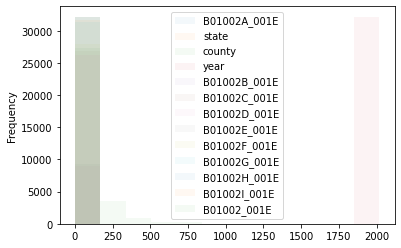

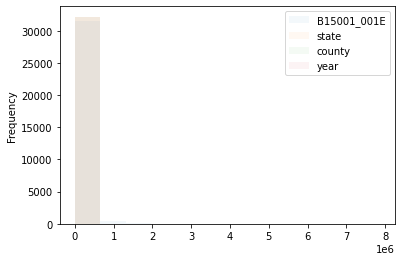

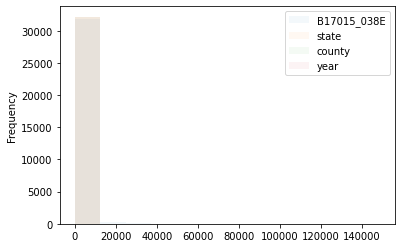

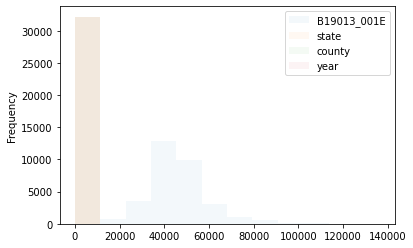

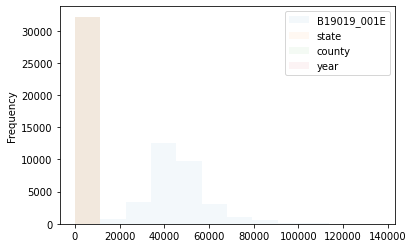

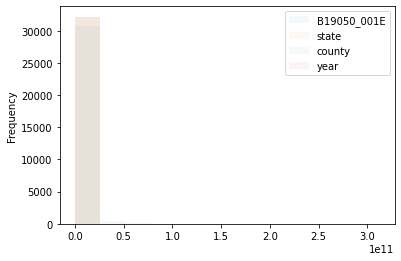

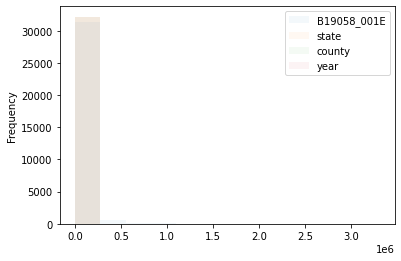

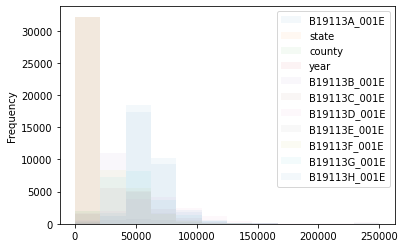

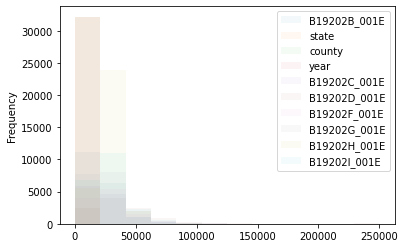

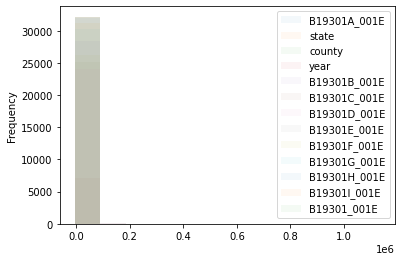

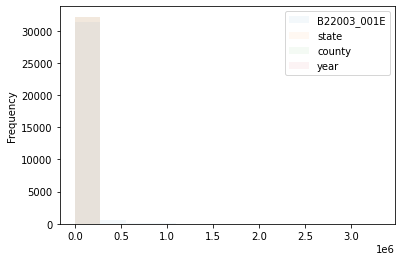

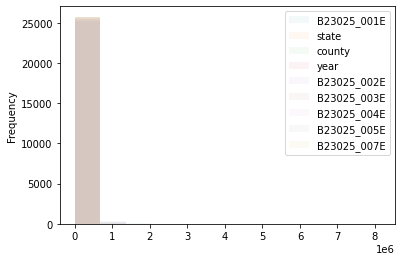

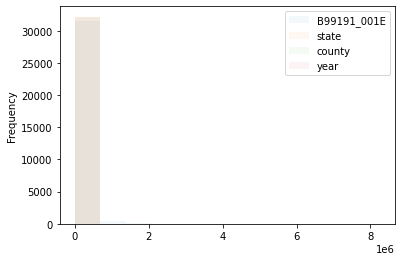

In [15]:
# Distributions of Census tables
for data in os.listdir('merged_files/'):
    if data.startswith('B'):
        df = pd.read_csv(f'merged_files/{data}')
        print('\n \n')
        print(f"Table Distributions for: {data} \n")
        print(df.plot.hist(bins=12, alpha=.05))
        print('\n \n')


In [16]:
df.head()

,NAME,B99191_001E,state,county,year
0,"Washington County, Mississippi",36811.0,28,151,2018
1,"Perry County, Mississippi",9718.0,28,111,2018
2,"Choctaw County, Mississippi",6813.0,28,19,2018
3,"Itawamba County, Mississippi",19273.0,28,57,2018
4,"Carroll County, Mississippi",8467.0,28,15,2018


In [17]:
# Look at burker kings by location
df = pd.read_csv(f'merged_files/bk_docs_merged.csv')

In [18]:
name = 'betty'
sentence = f'Hi my name is {name}'
print(sentence)

Hi my name is betty


<AxesSubplot:xlabel='City'>

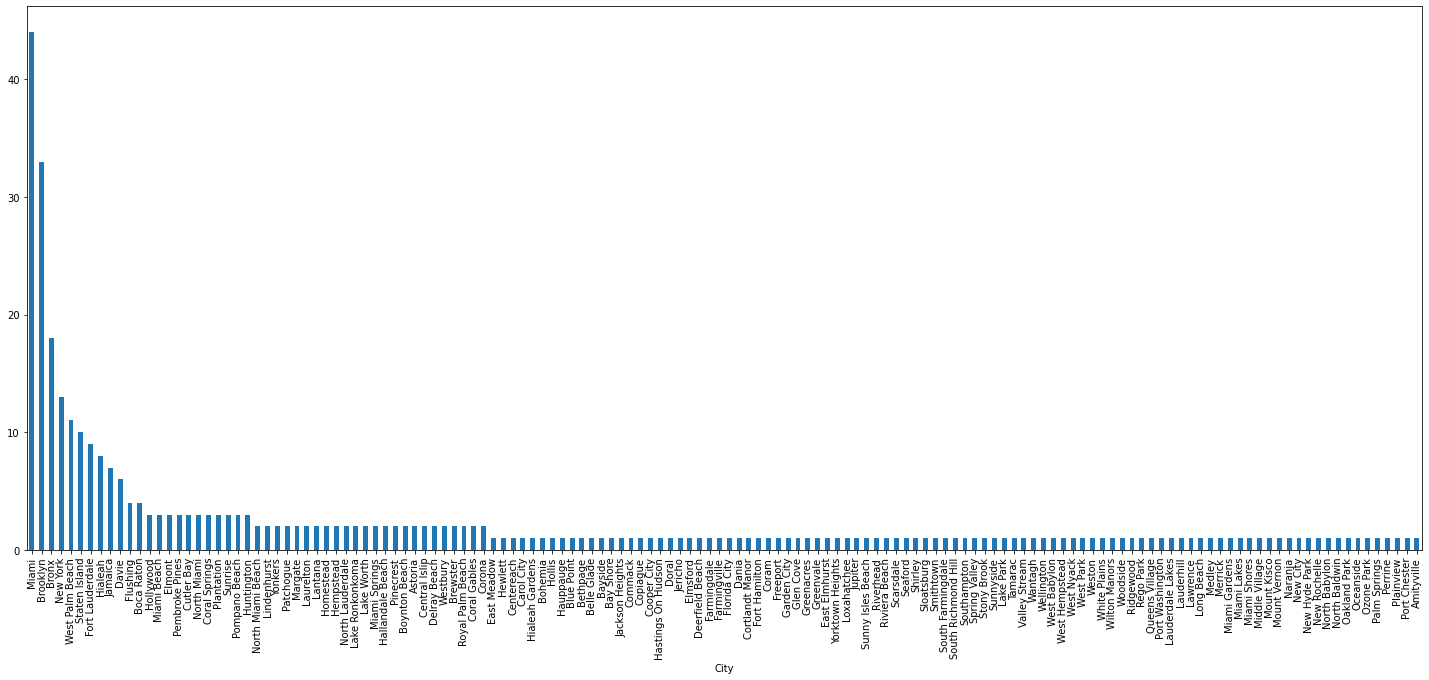

In [19]:
# Look at burker kings by location
df = pd.read_csv(f'merged_files/bk_docs_merged.csv')
plt.figure(figsize=(25,10))
df.groupby('City')['ZIP Code'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='City'>

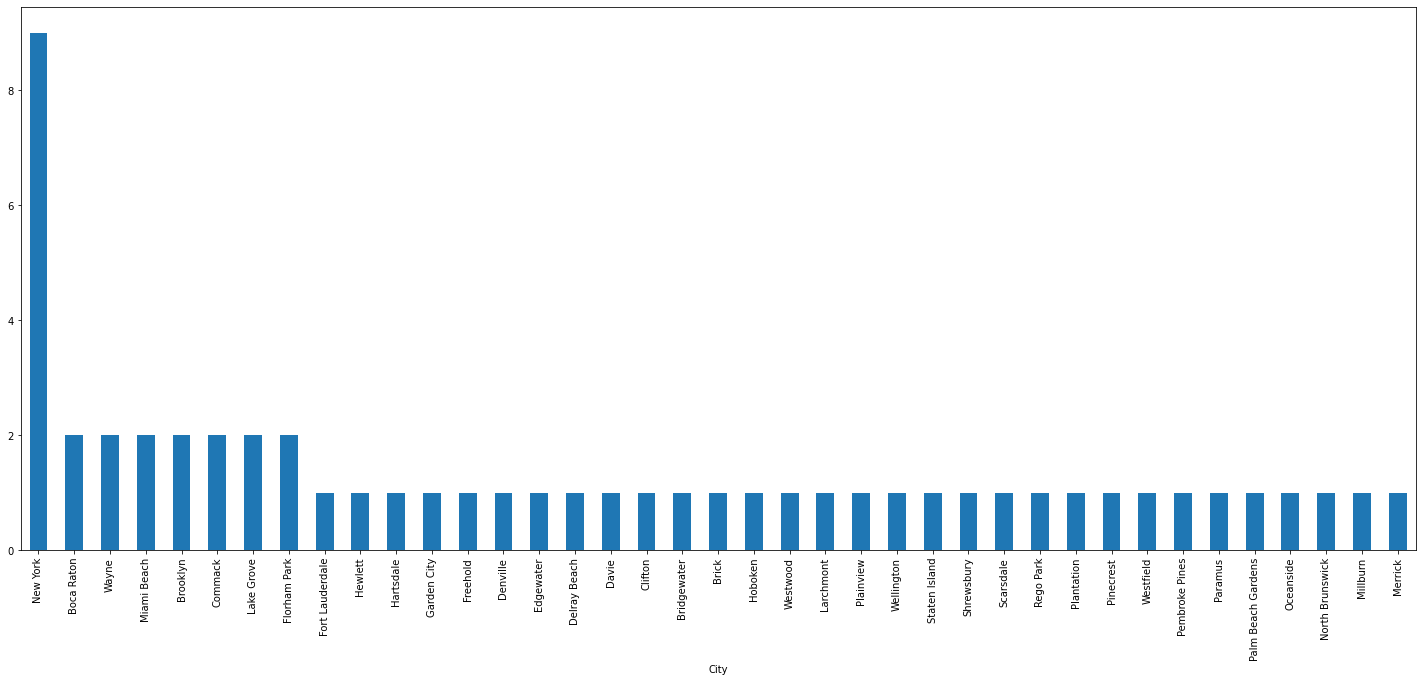

In [20]:
# Look at burker kings by location
df = pd.read_csv(f'merged_files/trader_merged.csv')
plt.figure(figsize=(25,10))
df.groupby('City')['ZIP Code'].count().sort_values(ascending=False).plot.bar()

In [21]:
company_McD = pd.read_csv('merged_files/McDonalds_merged.csv')

In [22]:
sorted(company_McD.columns)

['Accounting Expenses',
 'Address',
 'Advertising  Expenses',
 'Affiliated Locations',
 'Affiliated Records',
 'Carrier Route',
 'Census Block Group',
 'City',
 'Company Description',
 'Company Name',
 'Computer Expenses',
 'Contract Labor Expenses',
 'Corporate Employee Size Actual',
 'Corporate Employee Size Range',
 'Corporate Sales Volume Actual',
 'Corporate Sales Volume Range',
 'County',
 'Credit Cards Accepted',
 'Credit Score Alpha',
 'Cuisine Code',
 'Cuisine Code Description',
 'Delivery Point Barcode',
 'EIN 1',
 'EIN 2',
 'EIN 3',
 'Executive First Name',
 'Executive First Name 1',
 'Executive First Name 10',
 'Executive First Name 11',
 'Executive First Name 12',
 'Executive First Name 13',
 'Executive First Name 14',
 'Executive First Name 15',
 'Executive First Name 16',
 'Executive First Name 17',
 'Executive First Name 18',
 'Executive First Name 19',
 'Executive First Name 2',
 'Executive First Name 20',
 'Executive First Name 21',
 'Executive First Name 22',
 'Execu

In [23]:
#list of columns to drop
list1= {'Carrier Route', 'Facebook', 'Linked-In','Fax Number Combined',
'Foreign Parent Flag', 'Parent IUSA Number', 'Website', 'Subsidiary IUSA Number',
'Ticker Symbol', 'Toll Free Number Combined',
'Import Export Flag', 'Stock Exchange', 'Corporate Sales Volume Range', 
'Corporate Employee Size Range', 'Affiliated Records', 'Advertising Expenses',
'Credit Score Alpha', 'Credit Cards Accepted', 'Census Block Group',
'Federal Contractor', 'Delivery Point Barcode', 'Home Business',
'IUSA Number', 'Government Office', 'Firm or Individual',
'Cuisine Code', 'Cuisine Code Description', 'Record Type', 'Type of Business', 'Location Type',
'Affiliated Locations', 'Corporate Employee Size Actual', 'Fortune 1000 Ranking',
'Twitter', 'Fortune 1000 Ranking'}
list1

{'Advertising Expenses',
 'Affiliated Locations',
 'Affiliated Records',
 'Carrier Route',
 'Census Block Group',
 'Corporate Employee Size Actual',
 'Corporate Employee Size Range',
 'Corporate Sales Volume Range',
 'Credit Cards Accepted',
 'Credit Score Alpha',
 'Cuisine Code',
 'Cuisine Code Description',
 'Delivery Point Barcode',
 'Facebook',
 'Fax Number Combined',
 'Federal Contractor',
 'Firm or Individual',
 'Foreign Parent Flag',
 'Fortune 1000 Ranking',
 'Government Office',
 'Home Business',
 'IUSA Number',
 'Import Export Flag',
 'Linked-In',
 'Location Type',
 'Parent IUSA Number',
 'Record Type',
 'Stock Exchange',
 'Subsidiary IUSA Number',
 'Ticker Symbol',
 'Toll Free Number Combined',
 'Twitter',
 'Type of Business',
 'Website'}

In [24]:
# .loc[:,
company_McD_clean = company_McD[[ 'Advertising  Expenses', 'Accounting Expenses', 
 'Address',
 'City',
 'State',
 'County',
 'Metro Area',
 'Neighborhood',
 'ZIP Code',
 'ZIP Four',
 'Year Established',
 'Years In Database',
 'Company Name',
 'Computer Expenses',
 'Contract Labor Expenses',
 'Corporate Sales Volume Actual',
 'Insurance Expenses',
 'Last Updated On',
 'Legal Expenses',
 'Location Employee Size Actual',
 'Location Employee Size Range',
 'Location Sales Volume Actual',
 'Location Sales Volume Range',
 'Management/Administration Expenses',
 'Office Supplies Expense',
 'Own or Lease',
 'Package Container Expense',
 'Payroll and Benefits Expenses',
 'Purchase Print Expenses',
 'Rent Expenses',
 'Square Footage',
 'Telcom Expenses',
 'Utilities Expenses',
 ]]
company_McD_clean.head()

,Advertising Expenses,Accounting Expenses,Address,City,State,County,Metro Area,Neighborhood,ZIP Code,ZIP Four,...,Management/Administration Expenses,Office Supplies Expense,Own or Lease,Package Container Expense,Payroll and Benefits Expenses,Purchase Print Expenses,Rent Expenses,Square Footage,Telcom Expenses,Utilities Expenses
0,"$20,000 to $50,000","$2,500 to $5,000",265 W Oakland Park Blvd,Wilton Manors,FL,Broward,"Miami-Ft Ldr, FL",Sleepy River,33311,1707.0,...,"$10,000 to $25,000","$20,000 to $50,000",Own,"$10,000 to $25,000","$250,000 to $500,000","$1,000 to $2,500","$10,000 to $25,000","2,500 - 4,999","$2,000 to $5,000","$2,000 to $5,000"
1,"$50,000 to $100,000","$5,000 to $10,000",326 Indian Trce,Weston,FL,Broward,"Miami-Ft Ldr, FL",Weston,33326,2996.0,...,"$10,000 to $25,000","$50,000 to $100,000",Unknown,"$10,000 to $25,000","$500,000 to $1 Million","$2,500 to $5,000","$10,000 to $25,000","2,500 - 4,999","$5,000 to $20,000","$2,000 to $5,000"
2,"$50,000 to $100,000","$5,000 to $10,000",1020 Weston Rd,Weston,FL,Broward,"Miami-Ft Ldr, FL",NaN,33326,1917.0,...,"$10,000 to $25,000","$50,000 to $100,000",Own,"$10,000 to $25,000","$500,000 to $1 Million","$2,500 to $5,000","$100,000 to $250,000","2,500 - 4,999","$5,000 to $20,000","$50,000 to $100,000"
3,"$50,000 to $100,000","$5,000 to $10,000",9835 Okeechobee Blvd,West Palm Beach,FL,Palm Beach,"Miami-Ft Ldr, FL",Baywinds,33411,1833.0,...,"$10,000 to $25,000","$20,000 to $50,000",NaN,"$10,000 to $25,000","$500,000 to $1 Million","$1,000 to $2,500","$10,000 to $25,000","2,500 - 4,999","$5,000 to $20,000","$2,000 to $5,000"
4,"$50,000 to $100,000","$5,000 to $10,000",828 S Military Trl,West Palm Beach,FL,Palm Beach,"Miami-Ft Ldr, FL",NaN,33415,3908.0,...,"$10,000 to $25,000","$50,000 to $100,000",Own,"$25,000 to $50,000","$500,000 to $1 Million","$2,500 to $5,000","$10,000 to $25,000","2,500 - 4,999","$5,000 to $20,000","$2,000 to $5,000"


In [25]:
# # 
# company_McD_clean = company_McD.loc[:,[ 'Advertising  Expenses', 'Accounting Expenses', 
#  'Address',
#  'City',
#  'Company Name',
#  'Computer Expenses',
#  'Contract Labor Expenses',
#  'Corporate Sales Volume Actual',
#  'County',
#  'Insurance Expenses',
#  'Last Updated On',
#  'Legal Expenses',
#  'Location Employee Size Actual',
#  'Location Employee Size Range',
#  'Location Sales Volume Actual',
#  'Location Sales Volume Range',
#  'Management/Administration Expenses',
#  'Metro Area',
#  'Neighborhood',
#  'Office Supplies Expense',
#  'Own or Lease',
#  'Package Container Expense',
#  'Payroll and Benefits Expenses',
#  'Purchase Print Expenses',
#  'Rent Expenses',
#  'Square Footage',
#  'State',
#  'Telcom Expenses',
#  'Utilities Expenses',
#  'Year Established',
#  'Years In Database',
#  'ZIP Code', 
#  'ZIP Four']]
# company_McD_clean.head()

In [26]:
company_McD_clean.head()

,Advertising Expenses,Accounting Expenses,Address,City,State,County,Metro Area,Neighborhood,ZIP Code,ZIP Four,...,Management/Administration Expenses,Office Supplies Expense,Own or Lease,Package Container Expense,Payroll and Benefits Expenses,Purchase Print Expenses,Rent Expenses,Square Footage,Telcom Expenses,Utilities Expenses
0,"$20,000 to $50,000","$2,500 to $5,000",265 W Oakland Park Blvd,Wilton Manors,FL,Broward,"Miami-Ft Ldr, FL",Sleepy River,33311,1707.0,...,"$10,000 to $25,000","$20,000 to $50,000",Own,"$10,000 to $25,000","$250,000 to $500,000","$1,000 to $2,500","$10,000 to $25,000","2,500 - 4,999","$2,000 to $5,000","$2,000 to $5,000"
1,"$50,000 to $100,000","$5,000 to $10,000",326 Indian Trce,Weston,FL,Broward,"Miami-Ft Ldr, FL",Weston,33326,2996.0,...,"$10,000 to $25,000","$50,000 to $100,000",Unknown,"$10,000 to $25,000","$500,000 to $1 Million","$2,500 to $5,000","$10,000 to $25,000","2,500 - 4,999","$5,000 to $20,000","$2,000 to $5,000"
2,"$50,000 to $100,000","$5,000 to $10,000",1020 Weston Rd,Weston,FL,Broward,"Miami-Ft Ldr, FL",NaN,33326,1917.0,...,"$10,000 to $25,000","$50,000 to $100,000",Own,"$10,000 to $25,000","$500,000 to $1 Million","$2,500 to $5,000","$100,000 to $250,000","2,500 - 4,999","$5,000 to $20,000","$50,000 to $100,000"
3,"$50,000 to $100,000","$5,000 to $10,000",9835 Okeechobee Blvd,West Palm Beach,FL,Palm Beach,"Miami-Ft Ldr, FL",Baywinds,33411,1833.0,...,"$10,000 to $25,000","$20,000 to $50,000",NaN,"$10,000 to $25,000","$500,000 to $1 Million","$1,000 to $2,500","$10,000 to $25,000","2,500 - 4,999","$5,000 to $20,000","$2,000 to $5,000"
4,"$50,000 to $100,000","$5,000 to $10,000",828 S Military Trl,West Palm Beach,FL,Palm Beach,"Miami-Ft Ldr, FL",NaN,33415,3908.0,...,"$10,000 to $25,000","$50,000 to $100,000",Own,"$25,000 to $50,000","$500,000 to $1 Million","$2,500 to $5,000","$10,000 to $25,000","2,500 - 4,999","$5,000 to $20,000","$2,000 to $5,000"


In [27]:
company_McD_clean.shape

(724, 33)

In [28]:
sorted(company_McD_clean.columns)

['Accounting Expenses',
 'Address',
 'Advertising  Expenses',
 'City',
 'Company Name',
 'Computer Expenses',
 'Contract Labor Expenses',
 'Corporate Sales Volume Actual',
 'County',
 'Insurance Expenses',
 'Last Updated On',
 'Legal Expenses',
 'Location Employee Size Actual',
 'Location Employee Size Range',
 'Location Sales Volume Actual',
 'Location Sales Volume Range',
 'Management/Administration Expenses',
 'Metro Area',
 'Neighborhood',
 'Office Supplies Expense',
 'Own or Lease',
 'Package Container Expense',
 'Payroll and Benefits Expenses',
 'Purchase Print Expenses',
 'Rent Expenses',
 'Square Footage',
 'State',
 'Telcom Expenses',
 'Utilities Expenses',
 'Year Established',
 'Years In Database',
 'ZIP Code',
 'ZIP Four']

In [29]:
[col for col in company_McD_clean.columns if 'Expenses' in col]

['Advertising  Expenses',
 'Accounting Expenses',
 'Computer Expenses',
 'Contract Labor Expenses',
 'Insurance Expenses',
 'Legal Expenses',
 'Management/Administration Expenses',
 'Payroll and Benefits Expenses',
 'Purchase Print Expenses',
 'Rent Expenses',
 'Telcom Expenses',
 'Utilities Expenses']

In [30]:
# remove_close= [col for col in company_McD_clean.columns if 'Close' in col]
# remove_close

In [31]:
# remove_open = [col for col in company_McD_clean.columns if 'Open' in col]
# remove_open

In [32]:
# company_McD_clean = company_McD_clean.drop(columns=[col for col in company_McD_clean.columns if 'Open' in col])
# company_McD_clean = company_McD_clean.drop(columns=[col for col in company_McD_clean.columns if 'Close' in col])

In [33]:
# company_McD_clean['Company Description'].unique()

In [34]:
sorted(company_McD_clean.drop(columns=[col for col in company_McD_clean.columns if 'Expenses' in col]).columns)

['Address',
 'City',
 'Company Name',
 'Corporate Sales Volume Actual',
 'County',
 'Last Updated On',
 'Location Employee Size Actual',
 'Location Employee Size Range',
 'Location Sales Volume Actual',
 'Location Sales Volume Range',
 'Metro Area',
 'Neighborhood',
 'Office Supplies Expense',
 'Own or Lease',
 'Package Container Expense',
 'Square Footage',
 'State',
 'Year Established',
 'Years In Database',
 'ZIP Code',
 'ZIP Four']

In [35]:
company_McD_clean.isnull().sum()
# company_McD_clean.isnull().values.any()

Advertising  Expenses                   2
Accounting Expenses                     3
Address                                 0
City                                    0
State                                   0
County                                  0
Metro Area                              0
Neighborhood                          295
ZIP Code                                0
ZIP Four                               46
Year Established                      703
Years In Database                       0
Company Name                            0
Computer Expenses                       2
Contract Labor Expenses                 2
Corporate Sales Volume Actual           0
Insurance Expenses                      2
Last Updated On                         0
Legal Expenses                          3
Location Employee Size Actual           0
Location Employee Size Range            1
Location Sales Volume Actual            0
Location Sales Volume Range             2
Management/Administration Expenses

In [36]:
company_McD_clean['Own or Lease'].unique()

array(['Own', 'Unknown', nan, 'Lease'], dtype=object)

In [37]:
# company_McD_clean = company_McD_clean.drop(columns=[''], axis=1)

In [38]:
company_McD_clean['Address'].isnull().sum()
#.isnull().sum()
#.unique()

0

In [39]:
# [col for col in company_McD_clean.columns if 'Expenses' in col]

In [40]:
sorted(company_McD_clean.columns)

['Accounting Expenses',
 'Address',
 'Advertising  Expenses',
 'City',
 'Company Name',
 'Computer Expenses',
 'Contract Labor Expenses',
 'Corporate Sales Volume Actual',
 'County',
 'Insurance Expenses',
 'Last Updated On',
 'Legal Expenses',
 'Location Employee Size Actual',
 'Location Employee Size Range',
 'Location Sales Volume Actual',
 'Location Sales Volume Range',
 'Management/Administration Expenses',
 'Metro Area',
 'Neighborhood',
 'Office Supplies Expense',
 'Own or Lease',
 'Package Container Expense',
 'Payroll and Benefits Expenses',
 'Purchase Print Expenses',
 'Rent Expenses',
 'Square Footage',
 'State',
 'Telcom Expenses',
 'Utilities Expenses',
 'Year Established',
 'Years In Database',
 'ZIP Code',
 'ZIP Four']

In [41]:
company_McD_clean['Company Name'].unique()

array(["Mc Donald's", "Mc Donald's Corporate Office", 'Mc Donalds',
       'Mcdonalds Restaurants', "Mcdonald's Academy", "Mc Donald's Bbq",
       'Mc Donald Shipper Air Freight'], dtype=object)

In [42]:
# SELECT MCDONALDS ONLY FROM COMPANY NAME.

company_McD_clean = company_McD_clean[company_McD_clean['Company Name'].str.contains("Donald's")]
company_McD_clean 
#how to select string with apostrophe???? use double quotes
#throw out
# 'Mc Donald Shipper Air Freight', 'Mcdonald's Academy', 'Mc Donald's Bbq', 'Mc Donald's Corporate Office', 
# 'Mc Donald's Corporate Office', 'Mc Donalds',

,Advertising Expenses,Accounting Expenses,Address,City,State,County,Metro Area,Neighborhood,ZIP Code,ZIP Four,...,Management/Administration Expenses,Office Supplies Expense,Own or Lease,Package Container Expense,Payroll and Benefits Expenses,Purchase Print Expenses,Rent Expenses,Square Footage,Telcom Expenses,Utilities Expenses
0,"$20,000 to $50,000","$2,500 to $5,000",265 W Oakland Park Blvd,Wilton Manors,FL,Broward,"Miami-Ft Ldr, FL",Sleepy River,33311,1707.0,...,"$10,000 to $25,000","$20,000 to $50,000",Own,"$10,000 to $25,000","$250,000 to $500,000","$1,000 to $2,500","$10,000 to $25,000","2,500 - 4,999","$2,000 to $5,000","$2,000 to $5,000"
1,"$50,000 to $100,000","$5,000 to $10,000",326 Indian Trce,Weston,FL,Broward,"Miami-Ft Ldr, FL",Weston,33326,2996.0,...,"$10,000 to $25,000","$50,000 to $100,000",Unknown,"$10,000 to $25,000","$500,000 to $1 Million","$2,500 to $5,000","$10,000 to $25,000","2,500 - 4,999","$5,000 to $20,000","$2,000 to $5,000"
2,"$50,000 to $100,000","$5,000 to $10,000",1020 Weston Rd,Weston,FL,Broward,"Miami-Ft Ldr, FL",NaN,33326,1917.0,...,"$10,000 to $25,000","$50,000 to $100,000",Own,"$10,000 to $25,000","$500,000 to $1 Million","$2,500 to $5,000","$100,000 to $250,000","2,500 - 4,999","$5,000 to $20,000","$50,000 to $100,000"
3,"$50,000 to $100,000","$5,000 to $10,000",9835 Okeechobee Blvd,West Palm Beach,FL,Palm Beach,"Miami-Ft Ldr, FL",Baywinds,33411,1833.0,...,"$10,000 to $25,000","$20,000 to $50,000",NaN,"$10,000 to $25,000","$500,000 to $1 Million","$1,000 to $2,500","$10,000 to $25,000","2,500 - 4,999","$5,000 to $20,000","$2,000 to $5,000"
4,"$50,000 to $100,000","$5,000 to $10,000",828 S Military Trl,West Palm Beach,FL,Palm Beach,"Miami-Ft Ldr, FL",NaN,33415,3908.0,...,"$10,000 to $25,000","$50,000 to $100,000",Own,"$25,000 to $50,000","$500,000 to $1 Million","$2,500 to $5,000","$10,000 to $25,000","2,500 - 4,999","$5,000 to $20,000","$2,000 to $5,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,"$50,000 to $100,000","$5,000 to $10,000",724 E 241st St,Bronx,NY,Bronx,"Nw Yrk, NY-NJ-PA",Wakefield,10470,1302.0,...,"$10,000 to $25,000","$20,000 to $50,000",NaN,"$10,000 to $25,000","$500,000 to $1 Million","$1,000 to $2,500","$100,000 to $250,000","2,500 - 4,999","$5,000 to $20,000","$50,000 to $100,000"
720,"$20,000 to $50,000","$2,500 to $5,000",839 Westchester Ave,Bronx,NY,Bronx,"Nw Yrk, NY-NJ-PA",Woodstock,10455,1704.0,...,"$5,000 to $10,000","$20,000 to $50,000",NaN,"$10,000 to $25,000","$250,000 to $500,000","$1,000 to $2,500","Less than $10,000","2,500 - 4,999","$2,000 to $5,000","$2,000 to $5,000"
721,"$50,000 to $100,000","$5,000 to $10,000",86 E 167th St,Bronx,NY,Bronx,"Nw Yrk, NY-NJ-PA",Concourse,10452,8203.0,...,"$10,000 to $25,000","$20,000 to $50,000",NaN,"$10,000 to $25,000","$500,000 to $1 Million","$1,000 to $2,500","Less than $10,000","2,500 - 4,999","$5,000 to $20,000","Less than $2,000"
722,"$20,000 to $50,000","$2,500 to $5,000",875 Garrison Ave,Bronx,NY,Bronx,"Nw Yrk, NY-NJ-PA",Hunts Point,10474,5305.0,...,"$10,000 to $25,000","$20,000 to $50,000",NaN,"$10,000 to $25,000","$250,000 to $500,000","$1,000 to $2,500","$10,000 to $25,000","2,500 - 4,999","$2,000 to $5,000","$2,000 to $5,000"


In [43]:
# commit changes then push changes

# check out master
# pull from master

In [44]:
from pandas_profiling import ProfileReport

In [45]:
prof = ProfileReport(company_McD_clean)
prof.to_file(output_file='McD_output.html')

Summarize dataset:   0%|          | 0/47 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
company_bk = pd.read_csv('merged_files/bk_docs_merged.csv')


In [47]:
#list of columns to keep
list2 = {'Advertising  Expenses', 
 'Accounting Expenses', 
 'Address',
 'City',
 'State',
 'County',
 'Metro Area',
 'Neighborhood',
 'ZIP Code',
 'ZIP Four',
 'Year Established',
 'Years In Database',
 'Company Name',
 'Computer Expenses',
 'Contract Labor Expenses',
 'Corporate Sales Volume Actual',
 'Insurance Expenses',
 'Last Updated On',
 'Legal Expenses',
 'Location Employee Size Actual',
 'Location Employee Size Range',
 'Location Sales Volume Actual',
 'Location Sales Volume Range',
 'Management/Administration Expenses',
 'Office Supplies Expense',
 'Own or Lease',
 'Package Container Expense',
 'Payroll and Benefits Expenses',
 'Purchase Print Expenses',
 'Rent Expenses',
 'Square Footage',
 'Telcom Expenses',
 'Utilities Expenses'}
company_bk = company_bk[list2]

In [48]:
company_bk.isnull().sum()

Years In Database                       0
Utilities Expenses                      5
Location Sales Volume Range             6
Address                                 0
Metro Area                              0
Contract Labor Expenses                 5
Management/Administration Expenses      5
City                                    0
Year Established                      328
Location Sales Volume Actual            0
ZIP Code                                0
Square Footage                          0
Insurance Expenses                      5
Rent Expenses                           5
Computer Expenses                       5
Advertising  Expenses                   5
Payroll and Benefits Expenses           4
Location Employee Size Range            0
Corporate Sales Volume Actual           0
County                                  0
Last Updated On                         0
Accounting Expenses                     5
Purchase Print Expenses                 5
Company Name                      

In [49]:
company_bk.head()

,Years In Database,Utilities Expenses,Location Sales Volume Range,Address,Metro Area,Contract Labor Expenses,Management/Administration Expenses,City,Year Established,Location Sales Volume Actual,...,Company Name,Legal Expenses,Neighborhood,Package Container Expense,Office Supplies Expense,Telcom Expenses,Location Employee Size Actual,ZIP Four,State,Own or Lease
0,30,"$2,000 to $5,000",$1-2.5 Million,1104 Sunrise Hwy,"Nw Yrk, NY-NJ-PA","$1,000 to $10,000","$5,000 to $10,000",Amityville,NaN,"$1,180,000",...,Burger King,"$1,000 to $2,500",North Amityville,"$10,000 to $25,000","$20,000 to $50,000","$2,000 to $5,000",21,2513.0,NY,NaN
1,7,"$25,000 to $50,000",$1-2.5 Million,3310 21st St,"Nw Yrk, NY-NJ-PA","$1,000 to $10,000","$5,000 to $10,000",Astoria,NaN,"$1,186,000",...,Burger King,"$1,000 to $2,500",Astoria,"$10,000 to $25,000","$20,000 to $50,000","$2,000 to $5,000",25,4239.0,NY,NaN
2,24,"$2,000 to $5,000",$1-2.5 Million,3310 Astoria Blvd,"Nw Yrk, NY-NJ-PA","$1,000 to $10,000","$5,000 to $10,000",Astoria,NaN,"$1,186,000",...,Burger King,"$1,000 to $2,500",Astoria,"$10,000 to $25,000","$20,000 to $50,000","$2,000 to $5,000",25,4412.0,NY,NaN
3,37,"$2,000 to $5,000",$1-2.5 Million,335 E Main St,"Nw Yrk, NY-NJ-PA","$1,000 to $10,000","$5,000 to $10,000",Bay Shore,NaN,"$1,405,000",...,Burger King,"$1,000 to $2,500",Bay Shore,"$10,000 to $25,000","$20,000 to $50,000","$2,000 to $5,000",25,8410.0,NY,NaN
4,37,"$25,000 to $50,000",$1-2.5 Million,22210 Northern Blvd,"Nw Yrk, NY-NJ-PA","$1,000 to $10,000","$10,000 to $25,000",Bayside,NaN,"$1,660,000",...,Burger King,"$1,000 to $2,500",Bayside,"$10,000 to $25,000","$20,000 to $50,000","$2,000 to $5,000",35,3640.0,NY,Own


In [50]:
company_bk = company_bk[[ 'Advertising  Expenses', 'Accounting Expenses', 
 'Address',
 'City',
 'State',
 'County',
 'Metro Area',
 'Neighborhood',
 'ZIP Code',
 'ZIP Four',
 'Year Established',
 'Years In Database',
 'Company Name',
 'Computer Expenses',
 'Contract Labor Expenses',
 'Corporate Sales Volume Actual',
 'Insurance Expenses',
 'Last Updated On',
 'Legal Expenses',
 'Location Employee Size Actual',
 'Location Employee Size Range',
 'Location Sales Volume Actual',
 'Location Sales Volume Range',
 'Management/Administration Expenses',
 'Office Supplies Expense',
 'Own or Lease',
 'Package Container Expense',
 'Payroll and Benefits Expenses',
 'Purchase Print Expenses',
 'Rent Expenses',
 'Square Footage',
 'Telcom Expenses',
 'Utilities Expenses',
 ]]
company_bk.head()

,Advertising Expenses,Accounting Expenses,Address,City,State,County,Metro Area,Neighborhood,ZIP Code,ZIP Four,...,Management/Administration Expenses,Office Supplies Expense,Own or Lease,Package Container Expense,Payroll and Benefits Expenses,Purchase Print Expenses,Rent Expenses,Square Footage,Telcom Expenses,Utilities Expenses
0,"$20,000 to $50,000","$2,500 to $5,000",1104 Sunrise Hwy,Amityville,NY,Suffolk,"Nw Yrk, NY-NJ-PA",North Amityville,11701,2513.0,...,"$5,000 to $10,000","$20,000 to $50,000",NaN,"$10,000 to $25,000","$250,000 to $500,000","$1,000 to $2,500","$10,000 to $25,000","2,500 - 4,999","$2,000 to $5,000","$2,000 to $5,000"
1,"$20,000 to $50,000","$2,500 to $5,000",3310 21st St,Astoria,NY,Queens,"Nw Yrk, NY-NJ-PA",Astoria,11106,4239.0,...,"$5,000 to $10,000","$20,000 to $50,000",NaN,"$10,000 to $25,000","$250,000 to $500,000","$1,000 to $2,500","$50,000 to $100,000","2,500 - 4,999","$2,000 to $5,000","$25,000 to $50,000"
2,"$20,000 to $50,000","$2,500 to $5,000",3310 Astoria Blvd,Astoria,NY,Queens,"Nw Yrk, NY-NJ-PA",Astoria,11103,4412.0,...,"$5,000 to $10,000","$20,000 to $50,000",NaN,"$10,000 to $25,000","$250,000 to $500,000","$1,000 to $2,500","$10,000 to $25,000","2,500 - 4,999","$2,000 to $5,000","$2,000 to $5,000"
3,"$20,000 to $50,000","$2,500 to $5,000",335 E Main St,Bay Shore,NY,Suffolk,"Nw Yrk, NY-NJ-PA",Bay Shore,11706,8410.0,...,"$5,000 to $10,000","$20,000 to $50,000",NaN,"$10,000 to $25,000","$250,000 to $500,000","$1,000 to $2,500","$10,000 to $25,000","2,500 - 4,999","$2,000 to $5,000","$2,000 to $5,000"
4,"$20,000 to $50,000","$2,500 to $5,000",22210 Northern Blvd,Bayside,NY,Queens,"Nw Yrk, NY-NJ-PA",Bayside,11361,3640.0,...,"$10,000 to $25,000","$20,000 to $50,000",Own,"$10,000 to $25,000","$250,000 to $500,000","$1,000 to $2,500","$50,000 to $100,000","2,500 - 4,999","$2,000 to $5,000","$25,000 to $50,000"


In [51]:
prof = ProfileReport(company_bk)
prof.to_file(output_file='BK_output.html')

Summarize dataset:   0%|          | 0/46 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
company_ctown = pd.read_csv('merged_files/ctown_docs_merged.csv')


In [53]:
company_ctown = company_ctown[[ 'Advertising  Expenses', 'Accounting Expenses', 
 'Address',
 'City',
 'State',
 'County',
 'Metro Area',
 'Neighborhood',
 'ZIP Code',
 'ZIP Four',
 'Year Established',
 'Years In Database',
 'Company Name',
 'Computer Expenses',
 'Contract Labor Expenses',
 'Corporate Sales Volume Actual',
 'Insurance Expenses',
 'Last Updated On',
 'Legal Expenses',
 'Location Employee Size Actual',
 'Location Employee Size Range',
 'Location Sales Volume Actual',
 'Location Sales Volume Range',
 'Management/Administration Expenses',
 'Office Supplies Expense',
 'Own or Lease',
 'Package Container Expense',
 'Payroll and Benefits Expenses',
 'Purchase Print Expenses',
 'Rent Expenses',
 'Square Footage',
 'Telcom Expenses',
 'Utilities Expenses',
 ]]
company_ctown.head()

,Advertising Expenses,Accounting Expenses,Address,City,State,County,Metro Area,Neighborhood,ZIP Code,ZIP Four,...,Management/Administration Expenses,Office Supplies Expense,Own or Lease,Package Container Expense,Payroll and Benefits Expenses,Purchase Print Expenses,Rent Expenses,Square Footage,Telcom Expenses,Utilities Expenses
0,"Less than $5,000",Less than $500,229 E Tremont Ave,Bronx,NY,Bronx,"Nw Yrk, NY-NJ-PA",Mount Hope,10457,5303.0,...,"Less than $2,500","Less than $5,000",NaN,"$1,000 to $5,000","Less than $100,000",Less than $500,"$10,000 to $25,000","2,500 - 4,999","Less than $2,000","$5,000 to $10,000"
1,"$20,000 to $50,000","$2,500 to $5,000",264 E 204th St,Bronx,NY,Bronx,"Nw Yrk, NY-NJ-PA",Bedford Park,10458,1309.0,...,"$5,000 to $10,000","$10,000 to $20,000",NaN,"$10,000 to $25,000","$250,000 to $500,000","$1,000 to $2,500","$50,000 to $100,000","40,000 - 99,999","$2,000 to $5,000","$50,000 to $100,000"
2,"Less than $5,000",Less than $500,2733 3rd Ave,Bronx,NY,Bronx,"Nw Yrk, NY-NJ-PA",Mott Haven,10451,5801.0,...,"Less than $2,500","Less than $5,000",NaN,"$1,000 to $5,000","Less than $100,000",Less than $500,"$10,000 to $25,000","2,500 - 4,999","Less than $2,000","$5,000 to $10,000"
3,"$20,000 to $50,000","$2,500 to $5,000",2891 Sedgwick Ave,Bronx,NY,Bronx,"Nw Yrk, NY-NJ-PA",Kingsbridge Heights,10468,2098.0,...,"$5,000 to $10,000","$10,000 to $20,000",Own,"$10,000 to $25,000","$250,000 to $500,000","$1,000 to $2,500","$50,000 to $100,000","40,000 - 99,999","$2,000 to $5,000","$50,000 to $100,000"
4,"Less than $5,000",Less than $500,30 E 198th St,Bronx,NY,Bronx,"Nw Yrk, NY-NJ-PA",Fordham Manor,10468,1803.0,...,"Less than $2,500","Less than $5,000",NaN,"$1,000 to $5,000","Less than $100,000",Less than $500,"$10,000 to $25,000","2,500 - 4,999","Less than $2,000","$5,000 to $10,000"


In [54]:
prof = ProfileReport(company_ctown)
prof.to_file(output_file='ctown_output.html')

Summarize dataset:   0%|          | 0/46 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
company_Publix = pd.read_csv('merged_files/Publix_merged.csv')

In [56]:
company_Publix = company_Publix[[ 'Advertising  Expenses', 'Accounting Expenses', 
 'Address',
 'City',
 'State',
 'County',
 'Metro Area',
 'Neighborhood',
 'ZIP Code',
 'ZIP Four',
 'Year Established',
 'Years In Database',
 'Company Name',
 'Computer Expenses',
 'Contract Labor Expenses',
 'Corporate Sales Volume Actual',
 'Insurance Expenses',
 'Last Updated On',
 'Legal Expenses',
 'Location Employee Size Actual',
 'Location Employee Size Range',
 'Location Sales Volume Actual',
 'Location Sales Volume Range',
 'Management/Administration Expenses',
 'Office Supplies Expense',
 'Own or Lease',
 'Package Container Expense',
 'Payroll and Benefits Expenses',
 'Purchase Print Expenses',
 'Rent Expenses',
 'Square Footage',
 'Telcom Expenses',
 'Utilities Expenses',
 ]]
company_Publix.head()

,Advertising Expenses,Accounting Expenses,Address,City,State,County,Metro Area,Neighborhood,ZIP Code,ZIP Four,...,Management/Administration Expenses,Office Supplies Expense,Own or Lease,Package Container Expense,Payroll and Benefits Expenses,Purchase Print Expenses,Rent Expenses,Square Footage,Telcom Expenses,Utilities Expenses
0,"Over $250,000","Over $25,000",18995 Biscayne Blvd,Aventura,FL,Miami Dade,"Miami-Ft Ldr, FL",NaN,33180,2818.0,...,"$50,000 to $100,000","Over $250,000",Lease,"Over $50,000",$2.5 Million to $10 Million,"Over $25,000","Less than $10,000","1 - 1,499","$50,000 to $100,000","Less than $2,000"
1,"$100,000 to $250,000","$10,000 to $25,000",2952 Aventura Blvd,Aventura,FL,Miami Dade,"Miami-Ft Ldr, FL",NaN,33180,3103.0,...,"$25,000 to $50,000","$100,000 to $250,000",NaN,"Over $50,000",$2.5 Million to $10 Million,"$10,000 to $25,000","$50,000 to $100,000","40,000 - 99,999","$20,000 to $50,000","$10,000 to $25,000"
2,"Over $250,000","Over $25,000",1001 S Federal Hwy,Boca Raton,FL,Palm Beach,"Miami-Ft Ldr, FL",NaN,33432,7333.0,...,"$50,000 to $100,000","$100,000 to $250,000",Own,"Over $50,000",$2.5 Million to $10 Million,"$10,000 to $25,000","Over $500,000","40,000 - 99,999","$20,000 to $50,000","Over $100,000"
3,"$100,000 to $250,000","$10,000 to $25,000",11650 W Palmetto Park Rd,Boca Raton,FL,Palm Beach,"Miami-Ft Ldr, FL",Timberwalk,33428,2501.0,...,"$25,000 to $50,000","$100,000 to $250,000",NaN,"Over $50,000",$2.5 Million to $10 Million,"$10,000 to $25,000","Over $500,000","40,000 - 99,999","$20,000 to $50,000","Over $100,000"
4,"$100,000 to $250,000","$10,000 to $25,000",1339 W Palmetto Park Rd,Boca Raton,FL,Palm Beach,"Miami-Ft Ldr, FL",NaN,33486,3303.0,...,"$25,000 to $50,000","$100,000 to $250,000",Own,"Over $50,000",$2.5 Million to $10 Million,"$10,000 to $25,000","$50,000 to $100,000","40,000 - 99,999","$20,000 to $50,000","$25,000 to $50,000"


In [58]:
# prof = ProfileReport(company_Publix)
# prof.to_file(output_file='Publix_output.html')

In [65]:
# company_Publix.to_csv('company_Publix.csv')

In [68]:
!pip install xlwt openpyxl xlsxwriter xlrd

    100% |████████████████████████████████| 102kB 3.8MB/s a 0:00:01
    100% |████████████████████████████████| 245kB 6.2MB/s ta 0:00:011
    100% |████████████████████████████████| 153kB 14.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for et-xmlfile ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/2a/77/35/0da0965a057698121fc7d8c5a7a9955cdbfb3cc4e2423cad39
Successfully built et-xmlfile


In [69]:
company_Publix.to_excel('company_Publix.xlsx')